<a href="https://colab.research.google.com/github/Oscar-Velasquez/Programacion-III/blob/main/entrenandoUnaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [26]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [27]:
numeros_letras = ["Bota", "Pantalón", "Abrigo", "Vestido", "Sueter", "Saldalia", "Camisa", "Tenis", "Camiseta", "Bolsa"]

In [28]:
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print(numeros_ejemplo_entrenamiento, numeros_ejemplo_prueba)

60000 10000


In [29]:
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [30]:
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [31]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [32]:
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [33]:
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(batchsize)

In [34]:
modelo.fit(datos_entrenamiento, epochs=5,
           steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize))

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.5077 - accuracy: 0.8187
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3752 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3408 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3170 - accuracy: 0.8826
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3029 - accuracy: 0.8890


In [35]:
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print("Resultado de las pruebas", test_loss, test_accuracy)

313/313 [==============================] - 3s 4ms/step - loss: 0.3606 - accuracy: 0.8697
Resultado de las pruebas 0.3605715334415436 0.8697084784507751


In [36]:
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "blue"
  else:
    plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color=color)


In [37]:
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

In [38]:
def graficar_valores_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim(0,1)
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

1 1


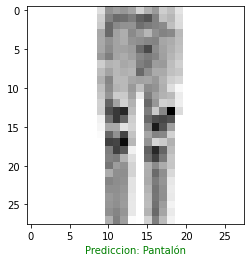

In [44]:
i=0
for miImg, etiqueta in datos_entrenamiento.take(1):
  etiqueta = etiqueta.numpy()
  img = miImg[i].numpy().reshape(1,28,28,1)
  prediccion = modelo.predict(img, batch_size=1)

  valor_predicho = np.argmax(prediccion)
  print(valor_predicho, etiqueta[i])

  plt.grid(False)
  plt.imshow(img[0,...,0], cmap=plt.cm.binary)
  plt.xlabel("Prediccion: {}".format(numeros_letras[valor_predicho]), color="green")